In [1]:
%run config.ipynb
import seaborn as sns
import featuretools as ft

## Reading Datasets

In [2]:
# business = pd.read_json("data/yelp_academic_dataset_business.json", lines=True)
# check_in = pd.read_json("data/yelp_academic_dataset_checkin.json", lines=True)

# choose a version to read the review file (json file is the original one and the csv file is the 0.01 sampled version)
# review = pd.read_csv("data/yelp_academic_dataset_sample_review.csv")
review = pd.read_csv("data/yelp_academic_dataset_sample005_review.csv")
# review = pd.read_json("data/yelp_academic_dataset_review.json", lines=True)
# tip = pd.read_json("data/yelp_academic_dataset_tip.json", lines=True)
user = pd.read_json("data/yelp_academic_dataset_user.json", lines=True)

In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80211 entries, 0 to 80210
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    80211 non-null  object
 1   user_id      80211 non-null  object
 2   business_id  80211 non-null  object
 3   stars        80211 non-null  int64 
 4   useful       80211 non-null  int64 
 5   funny        80211 non-null  int64 
 6   cool         80211 non-null  int64 
 7   text         80211 non-null  object
 8   date         80211 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.5+ MB


In [5]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320761 entries, 0 to 1320760
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   user_id           1320761 non-null  object        
 1   business_id       1320761 non-null  object        
 2   text              1320761 non-null  object        
 3   date              1320761 non-null  datetime64[ns]
 4   compliment_count  1320761 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 50.4+ MB


In [6]:
check_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175187 entries, 0 to 175186
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  175187 non-null  object
 1   date         175187 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [9]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209393 entries, 0 to 209392
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   209393 non-null  object 
 1   name          209393 non-null  object 
 2   address       209393 non-null  object 
 3   city          209393 non-null  object 
 4   state         209393 non-null  object 
 5   postal_code   209393 non-null  object 
 6   latitude      209393 non-null  float64
 7   longitude     209393 non-null  float64
 8   stars         209393 non-null  float64
 9   review_count  209393 non-null  int64  
 10  is_open       209393 non-null  int64  
 11  attributes    180348 non-null  object 
 12  categories    208869 non-null  object 
 13  hours         164550 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 22.4+ MB


In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968703 entries, 0 to 1968702
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 330.4+ MB


## Feature Engineering

In [3]:
es = ft.EntitySet()

In [6]:
es = es.entity_from_dataframe(entity_id = 'user', dataframe = user, index = 'user_id')
es = es.entity_from_dataframe(entity_id = 'review', dataframe = review, index = 'review_id')

In [8]:
user_features, user_feature_names = ft.dfs(entityset = es, target_entity = 'user', agg_primitives = ['mean', 'max', 'percent_true', 'last'])

t:\python\python38\lib\site-packages\featuretools\synthesis\dfs.py:317: UnusedPrimitiveWarning: Some specified primitives were not used during DFS:
  agg_primitives: ['last', 'max', 'mean', 'percent_true']
This may be caused by a using a value of max_depth that is too small, not setting interesting values, or it may indicate no compatible variable types for the primitive were found in the data.
  warnings.warn(warning_msg, UnusedPrimitiveWarning)


In [9]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1968703 entries, ntlvfPzc8eglqvk92iDIAw to 9lsXyOI065n-T0pJ_EoA_w
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   name                     object 
 1   review_count             int64  
 2   useful                   int64  
 3   funny                    int64  
 4   cool                     int64  
 5   elite                    object 
 6   fans                     int64  
 7   average_stars            float64
 8   compliment_hot           int64  
 9   compliment_more          int64  
 10  compliment_profile       int64  
 11  compliment_cute          int64  
 12  compliment_list          int64  
 13  compliment_note          int64  
 14  compliment_plain         int64  
 15  compliment_cool          int64  
 16  compliment_funny         int64  
 17  compliment_writer        int64  
 18  compliment_photos        int64  
 19  DAY(yelping_since)       int64  
 20  MONTH(yelping_s

In [10]:
review_features, review_feature_names = ft.dfs(entityset = es, target_entity = 'review', agg_primitives = ['mean', 'max', 'percent_true', 'last'])

In [11]:
review_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401056 entries, yNB39szX3M8mTEzTtsgoCw to 2-dE8HrcgshG3cWMe4GNzg
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   user_id               401056 non-null  object
 1   business_id           401056 non-null  object
 2   stars                 401056 non-null  int64 
 3   useful                401056 non-null  int64 
 4   funny                 401056 non-null  int64 
 5   cool                  401056 non-null  int64 
 6   DAY(date)             401056 non-null  int64 
 7   MONTH(date)           401056 non-null  int64 
 8   NUM_CHARACTERS(text)  401056 non-null  int64 
 9   NUM_WORDS(text)       401056 non-null  int64 
 10  WEEKDAY(date)         401056 non-null  int64 
 11  YEAR(date)            401056 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 39.8+ MB


In [ ]:
## TODO: Add something more on feature selection

## Visualization

In [3]:
review_freq = review.groupby(['stars'], as_index=False).size()

[Text(0, 0.5, '# reviews'), Text(0.5, 1.0, '# reviews in each star')]

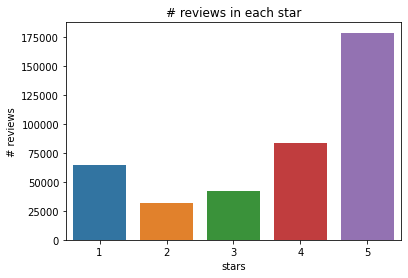

In [4]:
sns.barplot(x="stars", y="size", data=review_freq).set(ylabel="# reviews", title="# reviews in each star")

[Text(0.5, 1.0, '# reviews provided by the order of user popular')]

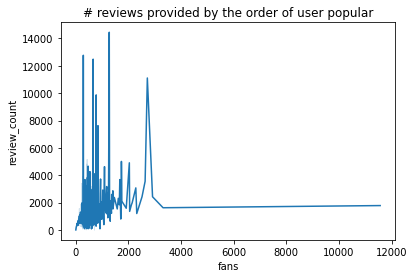

In [5]:
sns.lineplot(x="fans", y="review_count", data=user).set(title="# reviews provided by the order of user popular")

<ipython-input-6-2c7a21d3c60d>:1: RuntimeWarning: divide by zero encountered in log
  sns.lineplot(x="fans", y="review_count", data=np.log(user[["fans", "review_count"]])).set(title="# reviews provided by the logarithm order of user popular")


[Text(0.5, 1.0, '# reviews provided by the logarithm order of user popular')]

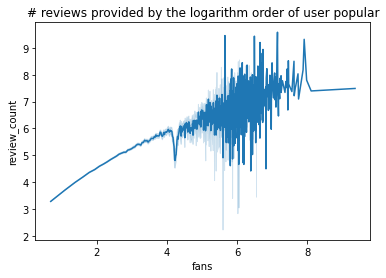

In [6]:
sns.lineplot(x="fans", y="review_count", data=np.log(user[["fans", "review_count"]])).set(title="# reviews provided by the logarithm order of user popular")

[Text(0, 0.5, '# useful votes'),
 Text(0.5, 1.0, 'comparison between # useful and # cool by given stars')]

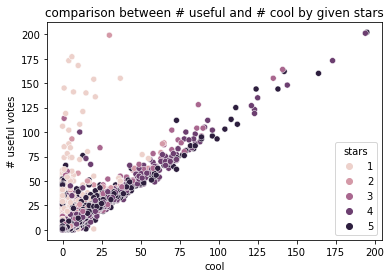

In [7]:
sns.scatterplot(x="cool", y="useful", hue="stars", data=review).set(ylabel="# useful votes", title="comparison between # useful and # cool by given stars")

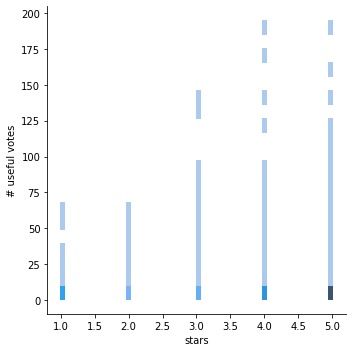

In [33]:
sns.displot(x="stars", y="cool", data=review).set(ylabel="# useful votes", title="")

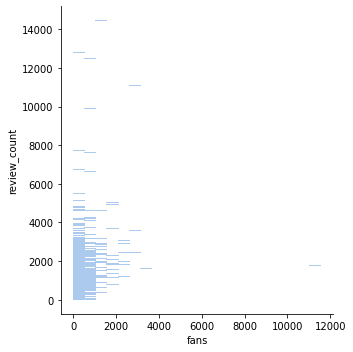

In [32]:
sns.displot(x="fans", y="review_count", data=user).set(title="")

[Text(0.5, 1.0, 'comparison between # cool votes and compliment_cool votes')]

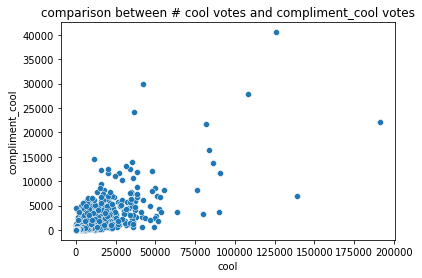

In [31]:
sns.scatterplot(x="cool", y="compliment_cool", data=user).set(title="comparison between # cool votes and compliment_cool votes")

[Text(0.5, 1.0, 'comparison between # reviews count and # friends the user have')]

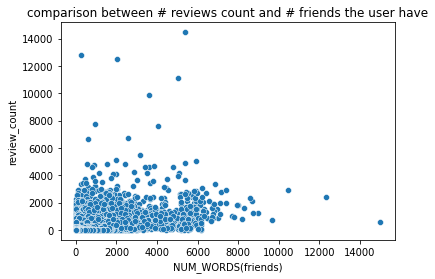

In [36]:
sns.scatterplot(x="NUM_WORDS(friends)", y="review_count", data=user_features).set(title="comparison between # reviews count and # friends the user have")

[Text(0.5, 0, 'year (20xx)'), Text(0.5, 1.0, '# users registered each year')]

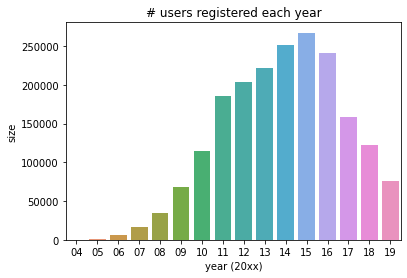

In [48]:
nusers_year = user_features.groupby(['YEAR(yelping_since)'], as_index=False).size()
nusers_year["YEAR(yelping_since)"] = nusers_year["YEAR(yelping_since)"].apply(lambda x : str(x)[2:])
sns.barplot(x="YEAR(yelping_since)", y="size", data=nusers_year).set(xlabel = "year (20xx)", title="# users registered each year")

[Text(0.5, 1.0, '# reviews made in each day')]

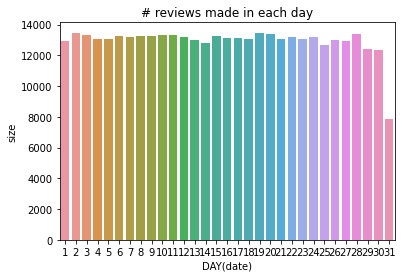

In [13]:
nreviews_day = review_features.groupby(['DAY(date)'], as_index=False).size()
sns.barplot(x="DAY(date)", y="size", data=nreviews_day).set(title="# reviews made in each day")

In [ ]:
nreviews_day = review_features.groupby(['WEEKDAY(date)'], as_index=False).size()
sns.barplot(x="WEEKDAY(date)", y="size", data=nreviews_day).set(title="# reviews made in each day")

[Text(0.5, 1.0, 'comparison between # words in review and stars given')]

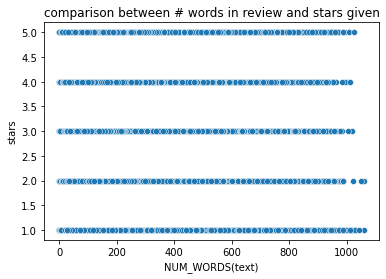

In [15]:
sns.scatterplot(x="NUM_WORDS(text)", y="stars", data=review_features).set(title="comparison between # words in review and stars given")

In [16]:
review_features["WEEKDAY(date)"]

review_id
yNB39szX3M8mTEzTtsgoCw    4
40I7k47AhStBAT-jYEYAAw    0
FdQYfgrRtmi_36S3cwVO5Q    1
GSNn8QyqVytg-5CFOeL_MA    4
wvpDEl6RUygLqnCazTcNYg    0
                         ..
XUikQYju8aeeK0Pl_SMl-A    5
EZ97THwgKAV5RklorwVbDg    3
RsnNPnZwTQRrwdCHAxp3kQ    2
qn6P0SaBAJkv26WnWLpt4g    0
2-dE8HrcgshG3cWMe4GNzg    2
Name: WEEKDAY(date), Length: 401056, dtype: int64